In [1]:
import pandas as pd 
from pandas import Series
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import math

data = pd.read_csv("dataUK.csv",encoding = "ISO-8859-1") 
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## Préparation des données pour faire le forecasting 

In [2]:
df = data[['InvoiceDate','UnitPrice','Quantity']]
df['Total_sell'] =  (df.UnitPrice)*(df.Quantity)
df

C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,InvoiceDate,UnitPrice,Quantity,Total_sell
0,12/1/2010 8:26,2.55,6,15.30
1,12/1/2010 8:26,3.39,6,20.34
2,12/1/2010 8:26,2.75,8,22.00
3,12/1/2010 8:26,3.39,6,20.34
4,12/1/2010 8:26,3.39,6,20.34
5,12/1/2010 8:26,7.65,2,15.30
6,12/1/2010 8:26,4.25,6,25.50
7,12/1/2010 8:28,1.85,6,11.10
8,12/1/2010 8:28,1.85,6,11.10
9,12/1/2010 8:34,1.69,32,54.08


In [3]:
TotalSellperDay = df.drop(['UnitPrice','Quantity'], axis=1)

In [4]:
TotalSellperDay

,InvoiceDate,Total_sell
0,12/1/2010 8:26,15.30
1,12/1/2010 8:26,20.34
2,12/1/2010 8:26,22.00
3,12/1/2010 8:26,20.34
4,12/1/2010 8:26,20.34
5,12/1/2010 8:26,15.30
6,12/1/2010 8:26,25.50
7,12/1/2010 8:28,11.10
8,12/1/2010 8:28,11.10
9,12/1/2010 8:34,54.08


In [5]:
ts = TotalSellperDay.set_index(['InvoiceDate'])
ts.index = pd.to_datetime(ts.index)
g_daily = ts.groupby(pd.Grouper(freq="D"))

#(temps exec ~ 1 minute )
#Requête prend du temps à s'exécuter mais le plot se fait rapidement car il s'agit du calcul de la recette journalière du store 
g_daily.sum() 

,Total_sell
InvoiceDate,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-04,0.00
2010-12-05,31383.95
2010-12-06,53860.18
2010-12-07,45059.05
2010-12-08,44189.84
2010-12-09,52532.13


## On remarque qu'il y a des jours avec 0.00 comme revenue total de la journée, après inspection de ces jours il s'est avéré que ce sont des samedis, jours fériers (succession de jours sans revenu)

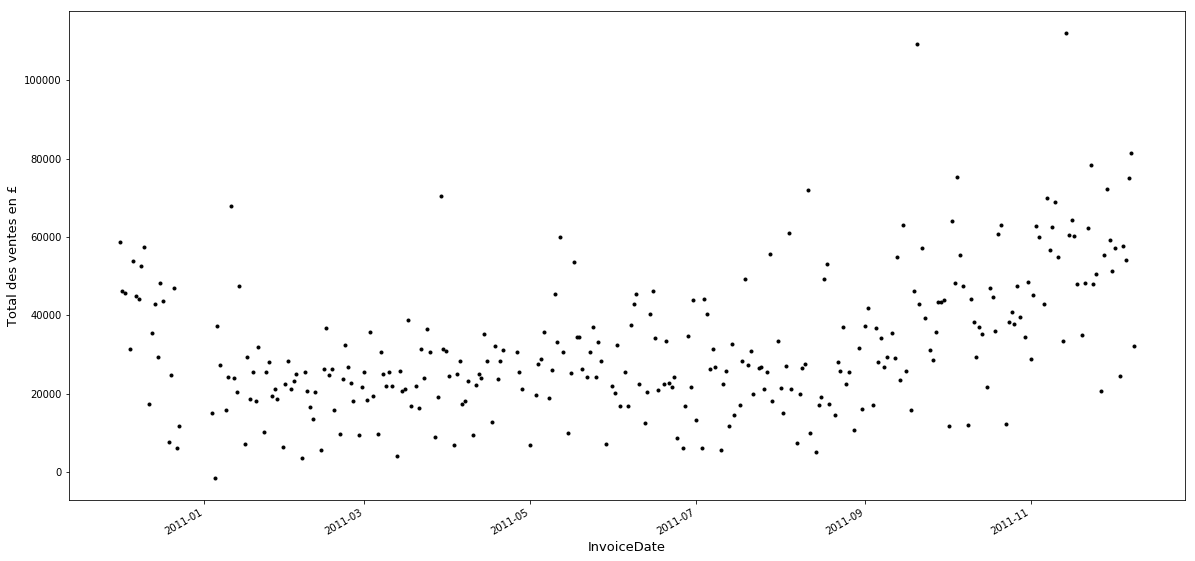

In [24]:
g_Daily_Without_Zeros=g_daily.sum()[g_daily.sum().Total_sell!=0]
ts_tot_Daily=g_Daily_Without_Zeros.squeeze()
plt.figure(figsize=(20,10))
plt.xlabel('Jours', fontsize=13)
plt.ylabel('Total des ventes en £', fontsize=13)
ts_tot_Daily.plot(style='k.')
plt.show()

Text(0.5,0,'Temps')

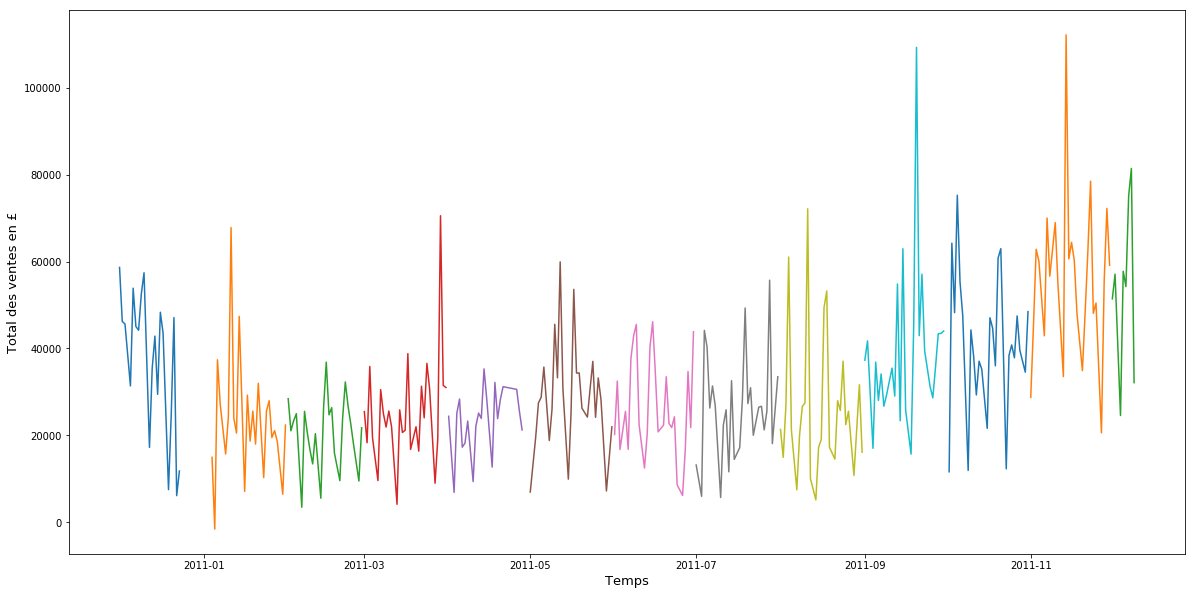

In [25]:
from pandas import DataFrame
from pandas import TimeGrouper

g_Monthly= ts.groupby(pd.Grouper(freq="M"))
ts_tot_Monthly=g_Monthly.sum()[g_Monthly.sum().Total_sell!=0].squeeze()
# ts_tot_Daily[str(ts_tot_Monthly.keys().values[0])[:7]]


ts_by_month=[]
for j in range(ts_tot_Monthly.keys().values.size):
    ts_by_month.append(ts_tot_Daily[str(ts_tot_Monthly.keys().values[j])[:7]])
plt.figure(figsize=(20,10))
for period in ts_by_month:
    plt.plot(period)

plt.ylabel('Total des ventes en £', fontsize=13)
plt.xlabel('Temps', fontsize=13)

## A partir de ce graphe on réalise que nous avons 13 mois de ventes dans notre historique (13 couleurs dans le graphes)

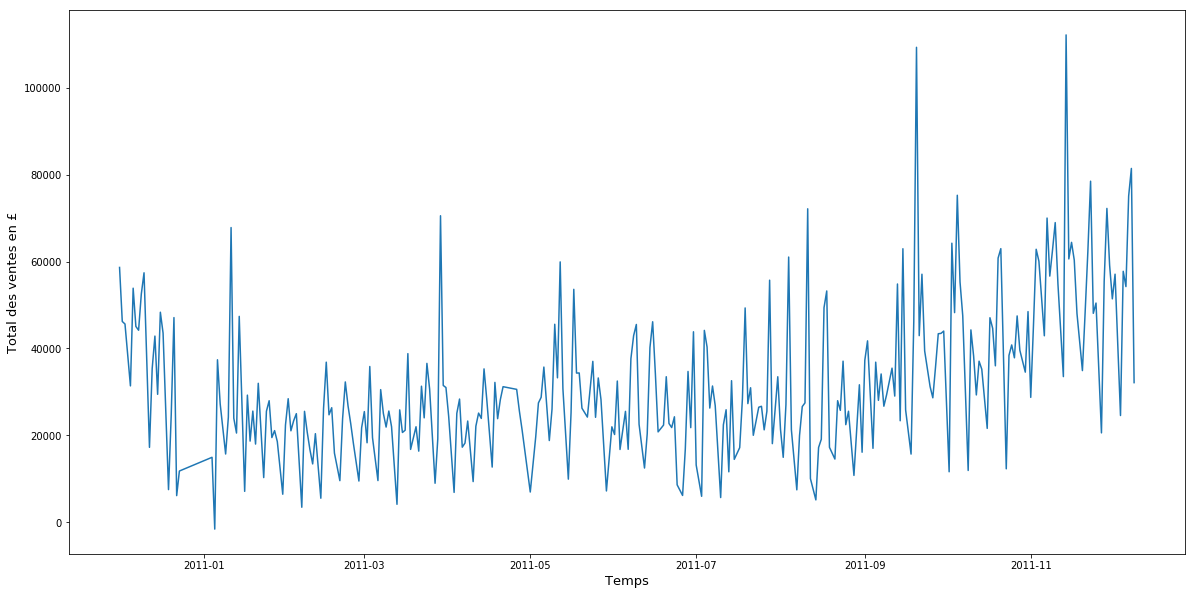

In [26]:
plt.figure(figsize=(20,10))
plt.ylabel('Total des ventes en £', fontsize=13)
plt.xlabel('Temps', fontsize=13)
plt.plot(ts_tot_Daily)

## On constate qu'il s'agit d'une time series avec les caractéristiques suivantes : 
- Pas de tendance claire pour l'évolution du chiffre d'affaire du magasin (ni haussière ni baissière)
- Une saisonnalité des ventes (Formes d'oscillations qui se répète de manière cyclique dans le temps)
- Il s'agit d'un modèle additif (car le support et la résistance sont parallèles)

## Analyse de la loi de distribution des ventes 

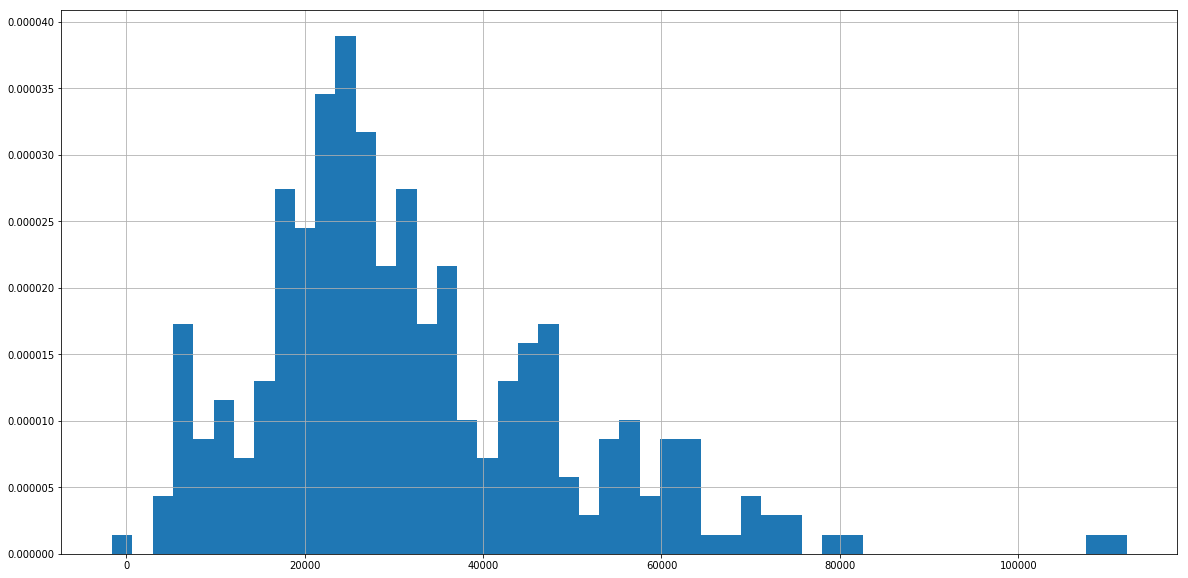

In [27]:
from scipy.stats import norm
import matplotlib.mlab as mlab
plt.figure(figsize=(20,10))
histBins=50
ts_tot_Daily.hist(density=True, bins=histBins)



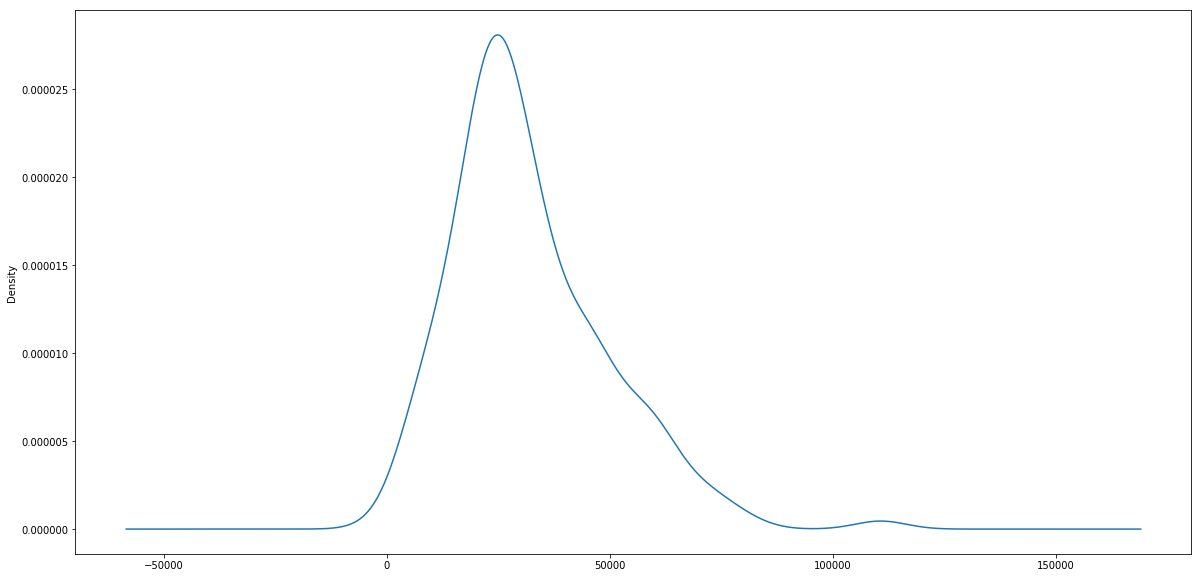

In [10]:
plt.figure(figsize=(20,10))
ts_tot_Daily.plot(kind='kde')
# for daily_bill in ts_tot_Daily:
#     if(daily_bill>0) : print(daily_bill)
    

## Les ventes journalières suivent une loi normale
rare sont les jours avec :
Un chiffre d'affaire négatif (beaucoup de retours, des clients qui demandent un rembourssement sur des produits défectueux)
Un chiffre d'affaire très grand (cela arrive uniquement dans des jours où il y a une forte demande, effet calendrier : Noel, vacances d'été)

# ANALYSE DES LAGS DE LA TIME SERIES

C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  


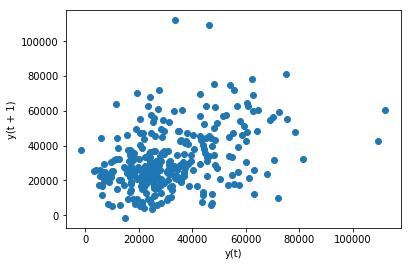

In [11]:
from pandas.tools.plotting import lag_plot
lag_plot(ts_tot_Daily)
plt.show()

<Figure size 432x288 with 0 Axes>

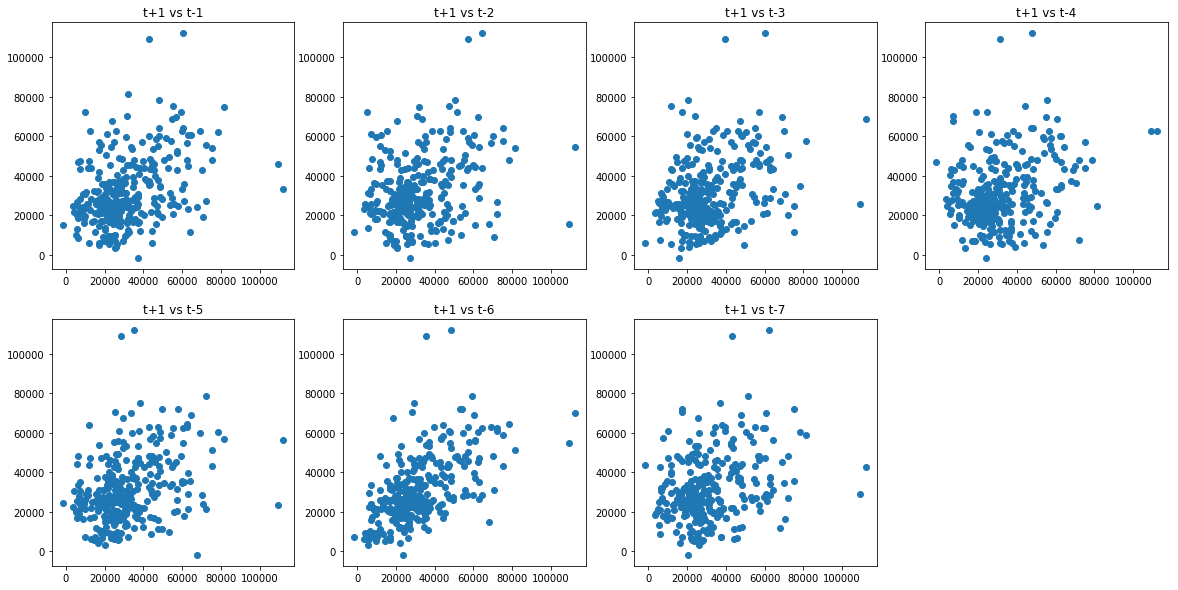

In [12]:
from pandas import concat
from pandas.plotting import scatter_matrix
values = DataFrame(ts_tot_Daily.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
plt.figure(figsize=(20,10))
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

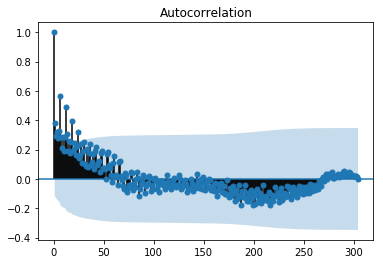

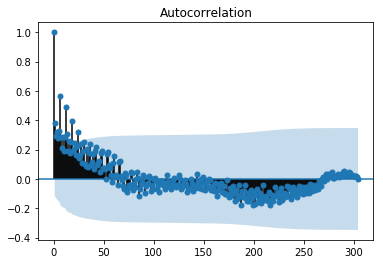

In [13]:
from  statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_tot_Daily)

## On constate qu'il y a une forte corrélation entre plus que 7 lags successifs (Dans le graphe d'ACF on constate plusieurs point qui sort de la bande d'autocorrelation faible et donc ils ont une valeur d'autocorrélation significative)  
## Conclusion : On peut donc prévoir 7 valeurs suivante par un modèle, sachant qu'on veut estimer le niveau et la saisonnalité on va donc appliquer un lissage exponentiel (Méthode de Holt-Winters) 

In [28]:
#Remove_Indexation
g_Daily_Without_Zeros.reset_index(inplace=True)

C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


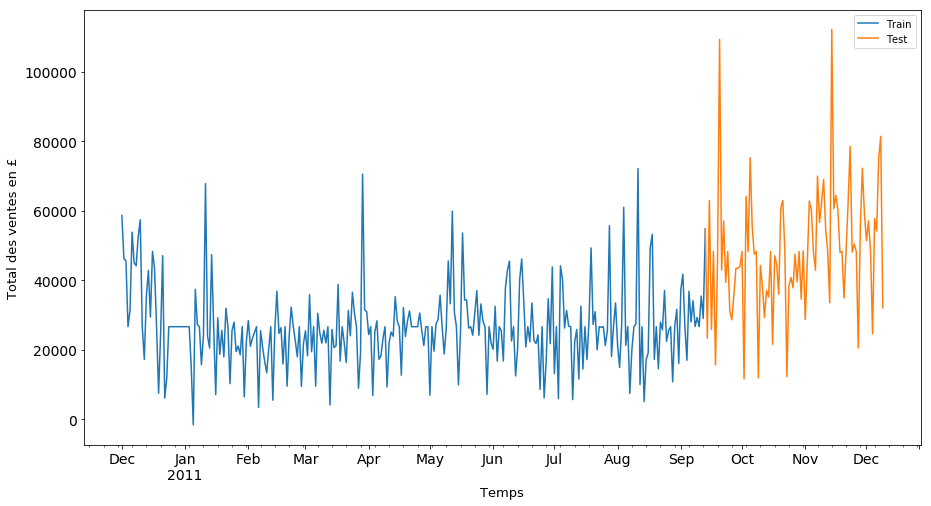

In [31]:
#Train_Test Repartition
train=g_Daily_Without_Zeros[0:230] 
test=g_Daily_Without_Zeros[230:]

mean_total_sell_list_TRAIN=train.Total_sell.mean()
mean_total_sell_list_TEST=test.Total_sell.mean()

train.Timestamp = pd.to_datetime(train.InvoiceDate,format='%m/%d/%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.InvoiceDate,format='%m/%d/%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

#Fill the missing values By mean
train['Total_sell'][train['Total_sell']!=train['Total_sell']]=mean_total_sell_list_TRAIN
test['Total_sell'][test['Total_sell']!=test['Total_sell']]=mean_total_sell_list_TEST
train.Total_sell.plot(figsize=(15,8), label='Train', fontsize=14)
test.Total_sell.plot(figsize=(15,8), label='Test', fontsize=14)

plt.ylabel('Total des ventes en £', fontsize=13)
plt.xlabel('Temps', fontsize=13)
plt.legend(loc='best')
plt.show()


In [33]:
#Evaluation de l'erreur de chaque modèle, avant le choix du meilleur en termes de performance (temps exec ~ 1,2 minute )
y_hat = test.copy()
fitList=[]
rmseList=[]
for j in range (1,20):
    fit1 = ExponentialSmoothing(np.asarray(train['Total_sell']),seasonal_periods=j*5 ,trend='add',  seasonal='add').fit()
    y_hat[j] = fit1.forecast(len(test))
    rmseList.append(math.sqrt(mean_squared_error(test.Total_sell, y_hat[j])))
    
rmseList

[24501.599969676518,
 24757.485094034066,
 20421.798323160467,
 21781.574862670237,
 21012.268403396665,
 20924.878976150037,
 21459.907672754744,
 23081.07003713358,
 23206.941842722295,
 23767.149580766596,
 23506.492415938326,
 22236.121913424857,
 21040.45795467727,
 20550.794972264986,
 22300.62285594011,
 21876.53107820576,
 21580.645773507975,
 28798.46522105832,
 26001.357859170985]

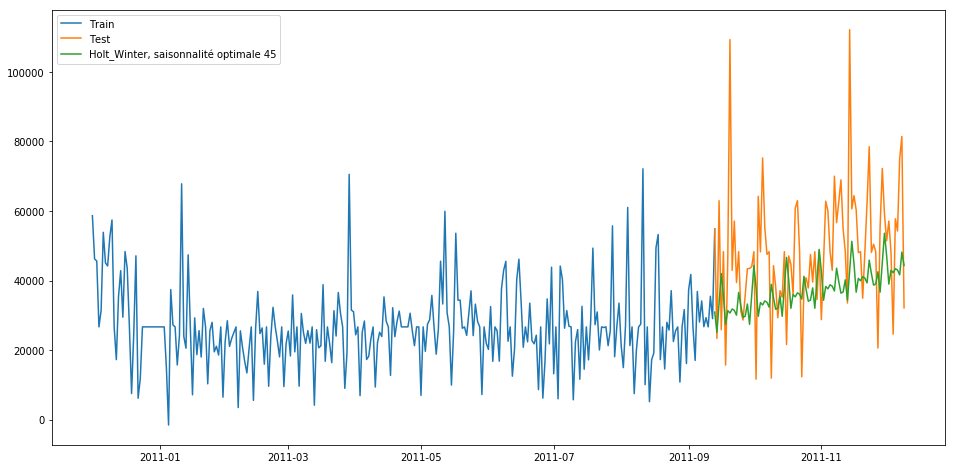

In [34]:
#choix du meilleur modèle
indexOfMinError=(np.asarray(rmseList)).argmin()+1
plt.figure(figsize=(16,8))
plt.plot( train['Total_sell'], label='Train')
plt.plot(test['Total_sell'], label='Test')
plt.plot(y_hat[indexOfMinError], label='Holt_Winter, saisonnalité optimale '+str(indexOfMinError*15))
    


plt.legend(loc='best')
plt.show()


## On constate après le choix du meilleur modèle Holt-Winters que la saisonnalité des ventes est le nombre de saisonnalité optimale marqué dans la légende du graphe ci-dessus.

In [35]:
g_Daily_Without_Zeros.reset_index(inplace=True)
Total = g_Daily_Without_Zeros[:]
mean_total_sell_list_TOTAL=Total.Total_sell.mean()
Total.Timestamp = pd.to_datetime(Total.InvoiceDate,format='%m/%d/%Y %H:%M') 
Total.index = Total.Timestamp 
Total = Total.resample('D').mean() 
Total['Total_sell'][Total['Total_sell']!=Total['Total_sell']]=mean_total_sell_list_TOTAL

C:\Users\Nassim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


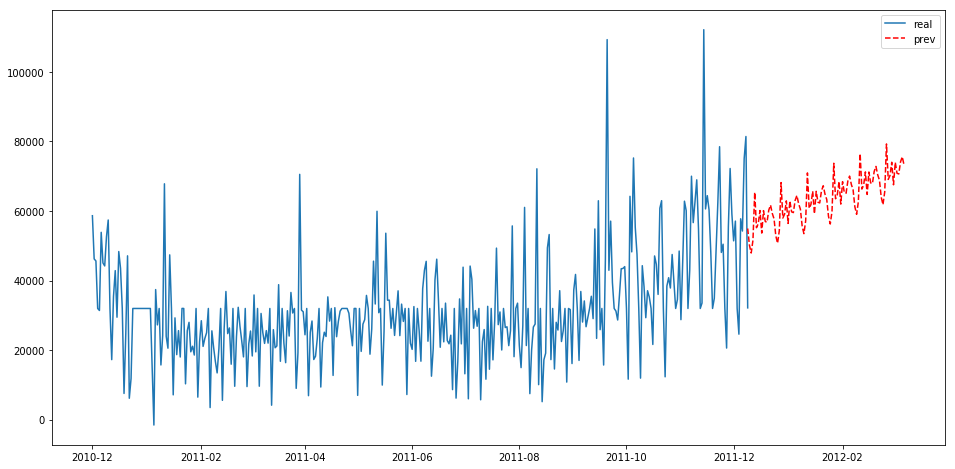

In [38]:
fitTotal= ExponentialSmoothing(np.asarray(Total['Total_sell']),seasonal_periods=indexOfMinError*5 ,trend='add',  seasonal='add').fit()
nextThreeMonthsList=[]
for j in range (90):
    nextThreeMonthsList.append(y_hat.index[-1]+j)
nextThreeMonths = pd.DataFrame({'InvoiceDate':nextThreeMonthsList})
nextThreeMonths['forecast']=fitTotal.forecast(len(nextThreeMonths))
forcast_ts=nextThreeMonths.set_index(['InvoiceDate'])
forcast_ts.index = pd.to_datetime(forcast_ts.index)
plt.figure(figsize=(16,8))
plt.plot( Total['Total_sell'], label='real')
plt.plot(forcast_ts['forecast'], label='prev', color='red', linestyle='--')

plt.legend(loc='best')
plt.show()
